# Customer Booking Prediction

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('DATA/customer_booking.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,49982.0,1.591133,1.020217,1.00,1.00,1.00,2.00,9.0
purchase_lead,49982.0,84.754652,89.923276,0.00,21.00,51.00,115.00,495.0
length_of_stay,49982.0,23.046757,33.892624,0.00,5.00,17.00,28.00,778.0
flight_hour,49982.0,9.065344,5.412551,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,49982.0,0.668881,0.470621,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,49982.0,0.297047,0.456962,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,49982.0,0.427174,0.494673,0.00,0.00,0.00,1.00,1.0
flight_duration,49982.0,7.277333,1.496829,4.67,5.62,7.57,8.83,9.5
booking_complete,49982.0,0.149574,0.356657,0.00,0.00,0.00,0.00,1.0


In [8]:
df.shape

(50000, 14)

## EDA

In [9]:
# Check for missing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### Univariate Analysis

#### Trip Type

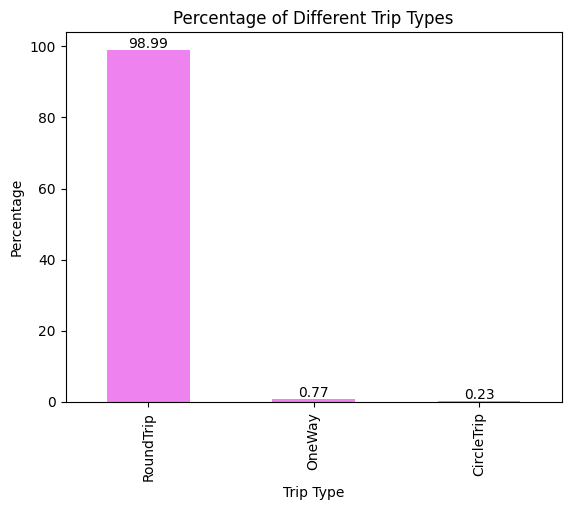

In [16]:
# plotting the percentage of Book type
book_type_counts = df['trip_type'].value_counts(normalize=True) * 100
book_type_counts.plot(kind='bar', color='violet')
plt.title('Percentage of Different Trip Types')
plt.xlabel('Trip Type')
plt.ylabel('Percentage')
for i, v in enumerate(book_type_counts):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center')
plt.show()

**Insights**
- Percentage of round trips: 98.994 % (More)
- Percentage of One way trips: 0.774 %
- Percentage of circle trips: 0.232 %

#### Sales Channel

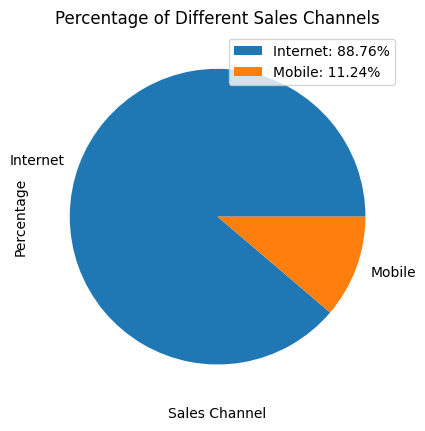

In [21]:
# plotting the percentage of sales channel
sales_channel_counts = df['sales_channel'].value_counts(normalize=True) * 100
sales_channel_counts.plot(kind='pie', color='blue')
plt.title('Percentage of Different Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Percentage')
plt.gca().set_aspect('equal')
plt.legend(labels=[f'{l}: {s:.2f}%' for l, s in zip(sales_channel_counts.index, sales_channel_counts)], loc='upper right')
plt.show()

**Insights**
- Percentage of internet: 88.76 % (More)
- People preffer to book in PC then in mobile phones


#### Purchase Lead

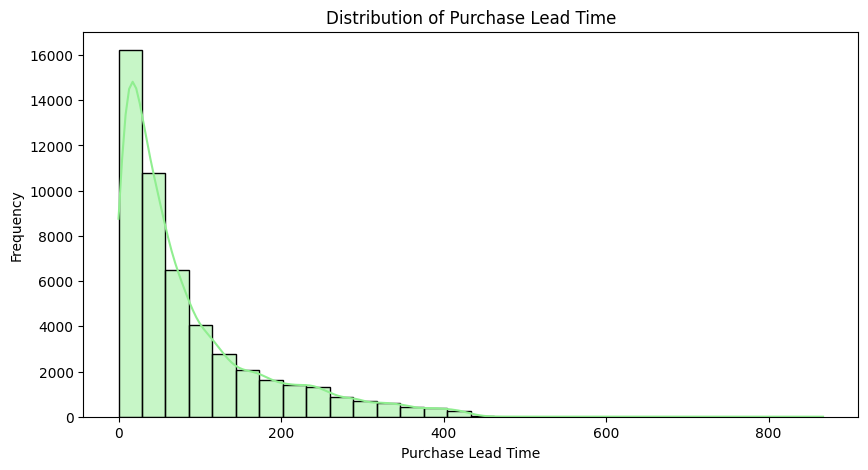

In [26]:
# plotting the purchase lead time
plt.figure(figsize=(10, 5))
sns.histplot(df['purchase_lead'], bins=30, color='lightgreen', kde=True)
plt.title('Distribution of Purchase Lead Time')
plt.xlabel('Purchase Lead Time')
plt.ylabel('Frequency')
plt.show()

**Insights**
- Some bookings are made more than 2 years in advance, which is highly unlikely.
- These cases might result from cancellation and rebooking processes, occurring twice within a 6-month period.
- Airlines typically allow ticket rebooking within a 1-year window.
- For now, consider these as outliers that could significantly impact predictive model performance.

In [27]:
(df.purchase_lead >= 500).value_counts()

purchase_lead
False    49982
True        18
Name: count, dtype: int64

In [28]:
#filtering the data to have only purchase lead days less than 500 days
df = df[df.purchase_lead <= 500 ]

#### Length of Stay

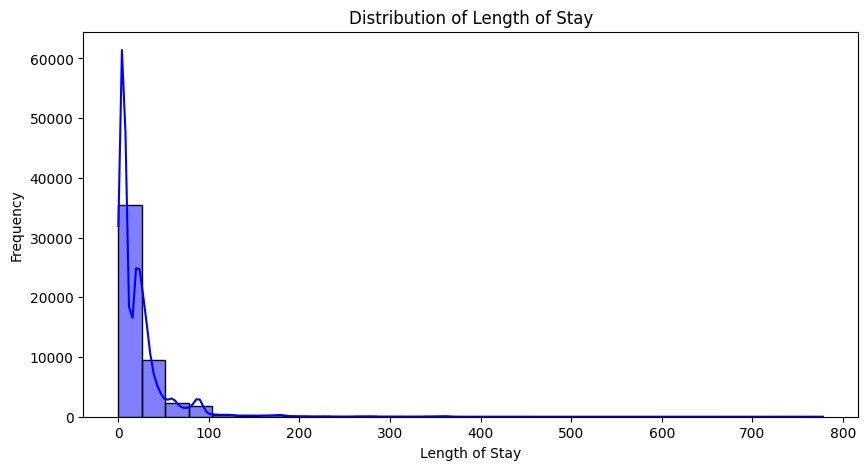

In [30]:
# plotting the length of stay
plt.figure(figsize=(10, 5))
sns.histplot(df['length_of_stay'], bins=30, color='blue', kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')
plt.show()

In [31]:
(df.length_of_stay >= 200).value_counts()

length_of_stay
False    49699
True       283
Name: count, dtype: int64

In [36]:
df[df.length_of_stay >= 400].booking_complete.value_counts()

booking_complete
0    13
1     4
Name: count, dtype: int64

There are presence of Outliers.

#### Day of Flight

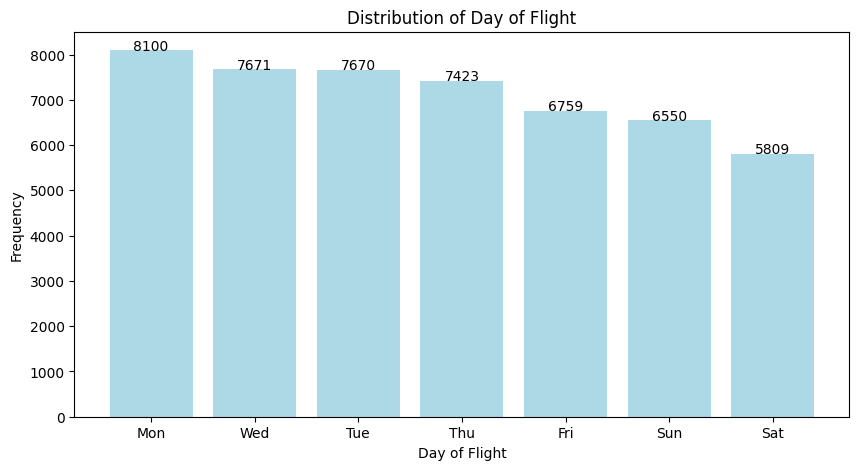

In [42]:
# plotting the day of flight
plt.figure(figsize=(10, 5))
plt.bar(df['flight_day'].value_counts().index, df['flight_day'].value_counts().values, color='lightblue')
for i, v in enumerate(df['flight_day'].value_counts().values):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.title('Distribution of Day of Flight')
plt.xlabel('Day of Flight')
plt.ylabel('Frequency')
plt.show()

**Insights**
- Monday seems to be most preffered day of flight and saturday least.

#### Booking Origin

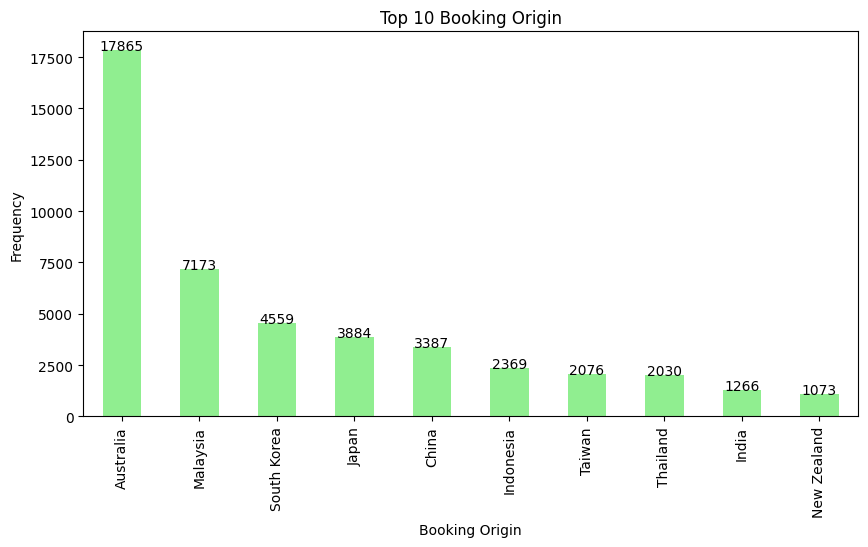

In [44]:
# plotting the top 10 booking origin
plt.figure(figsize=(10, 5))
top_10_origin = df['booking_origin'].value_counts().head(10)
top_10_origin.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Booking Origin')
plt.xlabel('Booking Origin')
plt.ylabel('Frequency')
for i, v in enumerate(top_10_origin):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.show()
 

#### Booking Complete

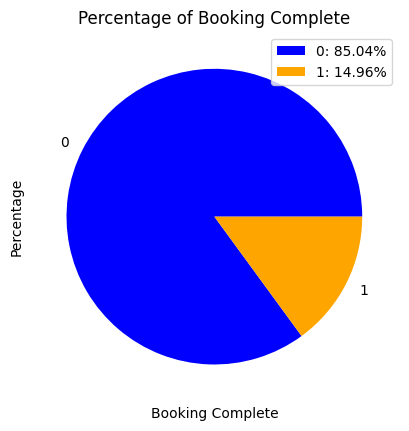

In [49]:
# plot pie for booking complete
booking_complete_counts = df['booking_complete'].value_counts(normalize=True) * 100
booking_complete_counts.plot(kind='pie', colors=['blue', 'orange'])
plt.title('Percentage of Booking Complete')
plt.xlabel('Booking Complete')
plt.ylabel('Percentage')
plt.gca().set_aspect('equal')
plt.legend(labels=[f'{l}: {s:.2f}%' for l, s in zip(booking_complete_counts.index, booking_complete_counts)], loc='upper right')
plt.show()

**Insights**
- Out 50000 only 14.69% customers completed booking

### Bivariant Analysis

#### Countries by Booking Complete

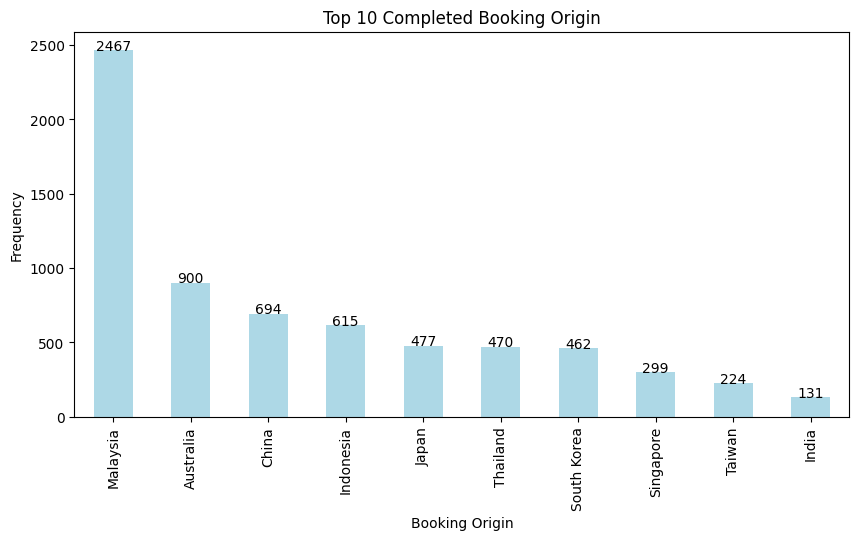

In [55]:
# plotting the top 10 booking which are completed
plt.figure(figsize=(10, 5))
top_10_completed = df[df['booking_complete'] == 1]['booking_origin'].value_counts().head(10)
top_10_completed.plot(kind='bar', color='lightblue')
plt.title('Top 10 Completed Booking Origin')
plt.xlabel('Booking Origin')
plt.ylabel('Frequency')
for i, v in enumerate(top_10_completed):
    plt.text(i, v + 0.5, str(v), ha='center')

### Sales Channel by the Booking Complete

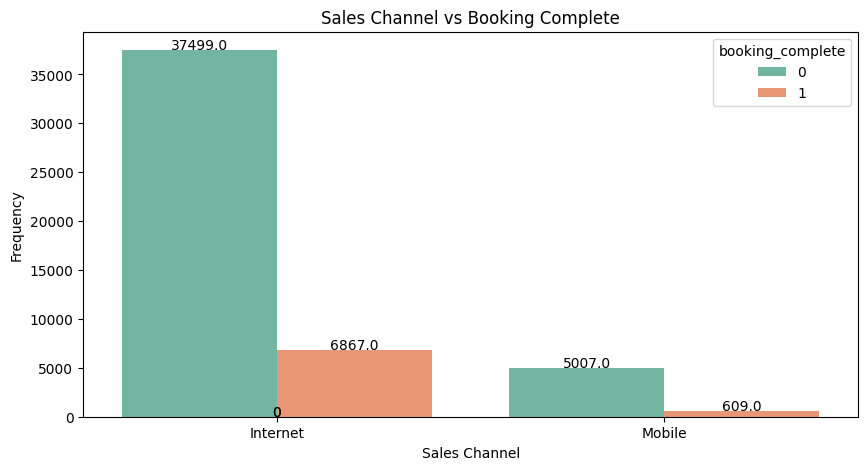

In [62]:
# plot sales channel vs booking complete
plt.figure(figsize=(10, 5))
sns.countplot(x='sales_channel', hue='booking_complete', data=df, palette='Set2')
plt.title('Sales Channel vs Booking Complete')
plt.xlabel('Sales Channel')
plt.ylabel('Frequency')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='top', color='black', xytext=(0, 20), textcoords='offset points')
plt.show()


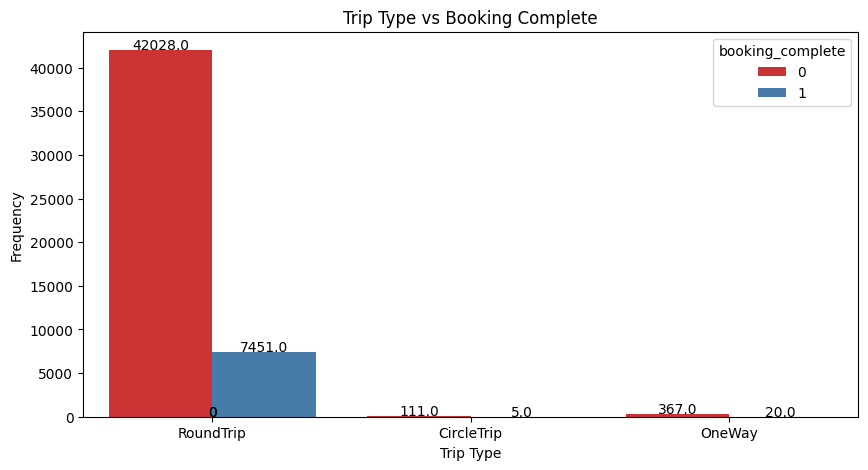

In [61]:
# plot trip type vs booking complete
plt.figure(figsize=(10, 5))
sns.countplot(x='trip_type', hue='booking_complete', data=df, palette='Set1')
plt.title('Trip Type vs Booking Complete')
plt.xlabel('Trip Type')
plt.ylabel('Frequency')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='top', color='black', xytext=(0, 20), textcoords='offset points')
plt.show()

## Data Preprocessing

In [67]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


#### Encoding Variables

In [64]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.copy()
df_encoded['trip_type'] = le.fit_transform(df['trip_type'])
df_encoded['sales_channel'] = le.fit_transform(df['sales_channel'])
df_encoded['flight_day'] = le.fit_transform(df['flight_day'])

In [68]:
df_encoded.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,2,112,20,3,2,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,2,243,22,17,6,AKLDEL,India,1,1,0,5.52,0
3,1,0,2,96,31,4,2,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,2,68,22,15,6,AKLDEL,India,1,0,1,5.52,0


#### Normalization

In [86]:
# Normalization of data using log transformation for purchase lead and length of stay
df_encoded['purchase_lead'] = np.log1p(df['purchase_lead'])
df_encoded['length_of_stay'] = np.log1p(df['length_of_stay'])

In [87]:
df_encoded.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,5.572154,2.995732,7,2,1,0,0,5.52,0
1,1,0,2,4.727388,3.044522,3,2,0,0,0,5.52,0
2,2,0,2,5.497168,3.135494,17,6,1,1,0,5.52,0
3,1,0,2,4.574711,3.465736,4,2,0,0,1,5.52,0
4,2,0,2,4.234107,3.135494,15,6,1,0,1,5.52,0


#### Correlation Plot

In [76]:
# Drop the column with object datatype
df_encoded.drop('booking_origin', axis=1, inplace=True)
df_encoded.drop('route', axis=1, inplace=True)
df_encoded.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,5.572154,2.995732,7,2,1,0,0,5.52,0
1,1,0,2,4.727388,3.044522,3,2,0,0,0,5.52,0
2,2,0,2,5.497168,3.135494,17,6,1,1,0,5.52,0
3,1,0,2,4.574711,3.465736,4,2,0,0,1,5.52,0
4,2,0,2,4.234107,3.135494,15,6,1,0,1,5.52,0


In [ ]:
# correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model Building

### Base Model

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = xgb.XGBClassifier()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

print('Logistic Regression Accuracy:', accuracy_score(y_test, lr_pred))
print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print('XGBoost Accuracy:', accuracy_score(y_test, xgb_pred))

print('Logistic Regression Confusion Matrix:\n', confusion_matrix(y_test, lr_pred))
print('Random Forest Confusion Matrix:\n', confusion_matrix(y_test, rf_pred))
print('XGBoost Confusion Matrix:\n', confusion_matrix(y_test, xgb_pred))

print('Logistic Regression Classification Report:\n', classification_report(y_test, lr_pred))
print('Random Forest Classification Report:\n', classification_report(y_test, rf_pred))
print('XGBoost Classification Report:\n', classification_report(y_test, xgb_pred))

Logistic Regression Accuracy: 0.8542562768830649
Random Forest Accuracy: 0.852255676703011
XGBoost Accuracy: 0.8498549564869461
Logistic Regression Confusion Matrix:
 [[8540    0]
 [1457    0]]
Random Forest Confusion Matrix:
 [[8423  117]
 [1360   97]]
XGBoost Confusion Matrix:
 [[8450   90]
 [1411   46]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8540
           1       0.00      0.00      0.00      1457

    accuracy                           0.85      9997
   macro avg       0.43      0.50      0.46      9997
weighted avg       0.73      0.85      0.79      9997

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8540
           1       0.45      0.07      0.12      1457

    accuracy                           0.85      9997
   macro avg       0.66      0.53      0.52      9997
weighted av

c:\Users\adnan\OneDrive\Desktop\Projects\British Airways\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adnan\OneDrive\Desktop\Projects\British Airways\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adnan\OneDrive\Desktop\Projects\British Airways\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

**Observation**

- The model completely fails to predict the minority class (1).
- The high accuracy is due to the correct prediction of the majority class (0), as class 1 predictions are ignored.
- The data is highly imbalanced (majority class 0 dominates), leading to poor recall and F1-score for the minority class 1.
- Accuracy is not an appropriate metric for this imbalanced dataset.

**Handle Class Imbalance**:

- Using techniques like SMOTE, ADASYN, or undersampling/oversampling to balance the dataset.


### Using SMOTE to Balance

In [92]:
# Balancing the data usinf SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_scaled, y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

lr.fit(X_train_smote, y_train_smote)
rf.fit(X_train_smote, y_train_smote)
xgb.fit(X_train_smote, y_train_smote)

lr_pred_smote = lr.predict(X_test_smote)
rf_pred_smote = rf.predict(X_test_smote)
xgb_pred_smote = xgb.predict(X_test_smote)

print('Logistic Regression Accuracy:', accuracy_score(y_test_smote, lr_pred_smote))
print('Random Forest Accuracy:', accuracy_score(y_test_smote, rf_pred_smote))
print('XGBoost Accuracy:', accuracy_score(y_test_smote, xgb_pred_smote))

print('Logistic Regression Classification Report:\n', classification_report(y_test_smote, lr_pred_smote))
print('Random Forest Classification Report:\n', classification_report(y_test_smote, rf_pred_smote))
print('XGBoost Classification Report:\n', classification_report(y_test_smote, xgb_pred_smote))


c:\Users\adnan\OneDrive\Desktop\Projects\British Airways\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\adnan\OneDrive\Desktop\Projects\British Airways\.venv\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Logistic Regression Accuracy: 0.6103040639887078
Random Forest Accuracy: 0.9075457272246075
XGBoost Accuracy: 0.8971946127154031
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.60      0.61      8466
           1       0.61      0.62      0.61      8537

    accuracy                           0.61     17003
   macro avg       0.61      0.61      0.61     17003
weighted avg       0.61      0.61      0.61     17003

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      8466
           1       0.94      0.87      0.90      8537

    accuracy                           0.91     17003
   macro avg       0.91      0.91      0.91     17003
weighted avg       0.91      0.91      0.91     17003

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91     

**Overall Performance:**

- Random Forest achieves slightly higher accuracy (90.8%) compared to XGBoost (89.7%)
- Both models show strong overall performance with balanced F1-scores around 0.90

- **Class 0 (Non-completed bookings)**:

    - Random Forest: Better precision (0.88) but slightly lower recall (0.95) than XGB
    - XGBoost: Lower precision (0.84) but higher recall (0.98)
    - Both achieve same F1-score (0.91) for this class

- **Class 1 (Completed bookings)**:

    - Random Forest: More balanced between precision (0.94) and recall (0.87)
    - XGBoost: Excellent precision (0.98) but lower recall (0.81)
    - Random Forest has slightly better F1-score (0.90) than XGBoost (0.89)

**Key Insights:**

- Random Forest provides more balanced predictions across both classes
- XGBoost is more conservative with Class 1 predictions, resulting in:

- Fewer false positives (high precision)
- More false negatives (lower recall)

- Random Forest might be preferable if missing completed bookings is costly
- XGBoost might be better if false positives are more concerning than false negatives

### Feature Importance

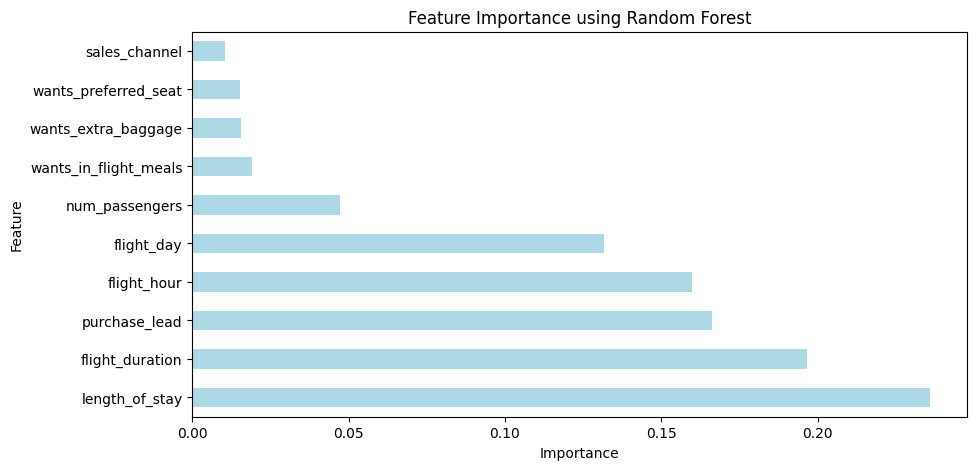

In [93]:
# feature importance using Random Forest
plt.figure(figsize=(10, 5))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='lightblue')
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Insights on Feature Importance**
**Key Contributors**:

- Length of Stay and Flight Duration: Most influential features, indicating strong correlations with booking completion.
- Purchase Lead, Flight Hour, and Flight Day: Moderate importance, reflecting booking timing and travel preferences.

**Low-Impact Features**:

- Num Passengers, Sales Channel, and preferences like In-Flight Meals, Extra Baggage, and Preferred Seat contribute minimally.

**Top 3 Insights**:

- **Length of Stay**: This feature significantly impacts the prediction. Longer or shorter stays may correlate with the likelihood of booking completion, potentially tied to customer travel patterns or intent (e.g., business trips vs. vacations).
- **Flight Duration**: The duration of the flight can influence booking decisions, as longer flights may correspond to more planned travel. Customers on longer flights may exhibit different booking behaviors than those on short-haul flights.
- **Purchase Lead**: The time between booking and travel date is a key indicator. Early bookings might signal planned and completed trips, whereas last-minute bookings may have a higher cancellation probability.
